# Get Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

import psycopg2
from psycopg2 import Error

In [2]:
try:
    connection = psycopg2.connect(user="YOUR NETID",
                                  password="YOUR PASSWORD",
                                  host="pg.analytics.northwestern.edu",
                                  port="5432",
                                  database="everything2023")

    cursor = connection.cursor()
    cursor.execute("SELECT version();")
    record = cursor.fetchone()

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)

In [3]:
store_df = pd.read_sql("SELECT * FROM group_5.final_clean_data_ll;", connection);
store_df

,STORE,AvgCOGS_peritem,MoMGrowth,ReturnPercentage,CITY,success,Latitude,Longitude
0,102,18.656348,0.102883,7.297510,TAMPA,0,27.9517,-82.4588
1,103,17.761179,-1.857504,8.766210,ST LOUIS,0,38.6270,-90.1994
2,107,16.975893,0.350877,8.382016,HURST,0,32.8235,-97.1706
3,202,15.533738,0.190422,8.271629,TAMPA,0,27.9517,-82.4588
4,203,16.687797,-0.614171,10.119624,CHESTERFIELD,0,38.6631,-90.5771
...,...,...,...,...,...,...,...,...
325,9704,13.149763,0.078428,6.546315,SHAWNEE,0,39.0228,-94.7152
326,9709,13.221052,-1.186029,6.835200,GREELEY,0,40.4233,-104.7091
327,9804,14.891369,0.068109,7.260616,LAWTON,0,34.6036,-98.3959
328,9806,17.679472,0.040775,4.250364,MABELVALE,0,34.6557,-92.3885


In [4]:
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 

PostgreSQL connection is closed


# Data Viz

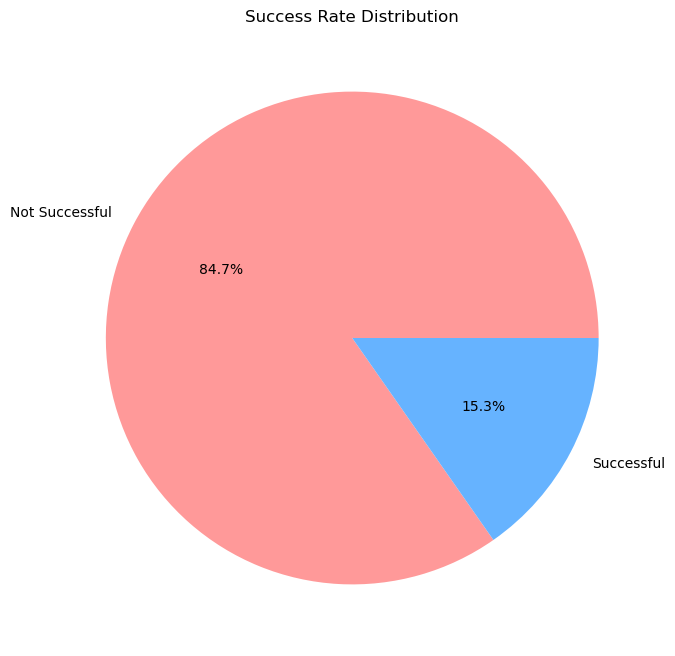

In [5]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(store_df['success'].value_counts(), labels=['Not Successful', 'Successful'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])

# Add title
plt.title('Success Rate Distribution')

plt.show()

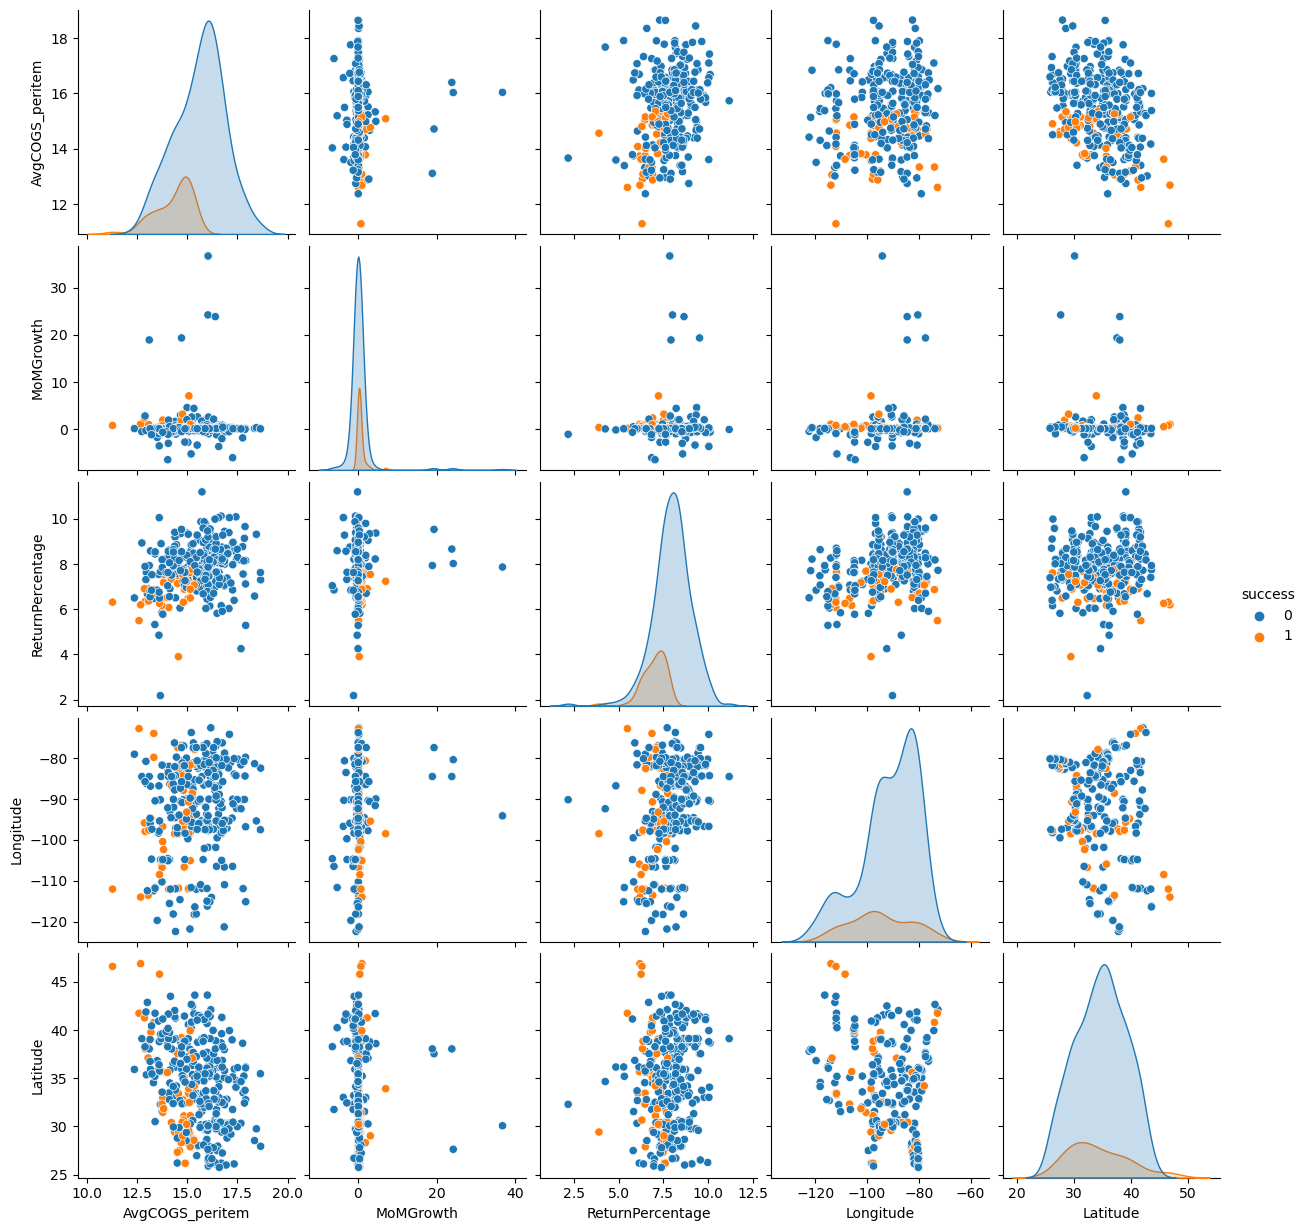

In [6]:
sns.pairplot(store_df[['AvgCOGS_peritem', 'MoMGrowth', 'ReturnPercentage', 'Longitude', 'Latitude', 'success']], hue='success', diag_kind='kde')
plt.show()

Before data engineering, we manually add two columns `longitude` and `latitude` to the csv we are going to use, according to the `CITY` column by searching online.

# Data Engineering

In [7]:
# Create interaction features
store_df['AM_Interaction'] = store_df['AvgCOGS_peritem'] * store_df['MoMGrowth']
store_df

,STORE,AvgCOGS_peritem,MoMGrowth,ReturnPercentage,CITY,success,Latitude,Longitude,AM_Interaction
0,102,18.656348,0.102883,7.297510,TAMPA,0,27.9517,-82.4588,1.919418
1,103,17.761179,-1.857504,8.766210,ST LOUIS,0,38.6270,-90.1994,-32.991470
2,107,16.975893,0.350877,8.382016,HURST,0,32.8235,-97.1706,5.956448
3,202,15.533738,0.190422,8.271629,TAMPA,0,27.9517,-82.4588,2.957959
4,203,16.687797,-0.614171,10.119624,CHESTERFIELD,0,38.6631,-90.5771,-10.249168
...,...,...,...,...,...,...,...,...,...
325,9704,13.149763,0.078428,6.546315,SHAWNEE,0,39.0228,-94.7152,1.031308
326,9709,13.221052,-1.186029,6.835200,GREELEY,0,40.4233,-104.7091,-15.680545
327,9804,14.891369,0.068109,7.260616,LAWTON,0,34.6036,-98.3959,1.014239
328,9806,17.679472,0.040775,4.250364,MABELVALE,0,34.6557,-92.3885,0.720874


In [8]:
store_df_wo_city = store_df[['STORE', 'AvgCOGS_peritem', 'MoMGrowth', 'ReturnPercentage', 'AM_Interaction', 'Latitude', 'Longitude', 'success']]
store_df_wo_city

,STORE,AvgCOGS_peritem,MoMGrowth,ReturnPercentage,AM_Interaction,Latitude,Longitude,success
0,102,18.656348,0.102883,7.297510,1.919418,27.9517,-82.4588,0
1,103,17.761179,-1.857504,8.766210,-32.991470,38.6270,-90.1994,0
2,107,16.975893,0.350877,8.382016,5.956448,32.8235,-97.1706,0
3,202,15.533738,0.190422,8.271629,2.957959,27.9517,-82.4588,0
4,203,16.687797,-0.614171,10.119624,-10.249168,38.6631,-90.5771,0
...,...,...,...,...,...,...,...,...
325,9704,13.149763,0.078428,6.546315,1.031308,39.0228,-94.7152,0
326,9709,13.221052,-1.186029,6.835200,-15.680545,40.4233,-104.7091,0
327,9804,14.891369,0.068109,7.260616,1.014239,34.6036,-98.3959,0
328,9806,17.679472,0.040775,4.250364,0.720874,34.6557,-92.3885,0


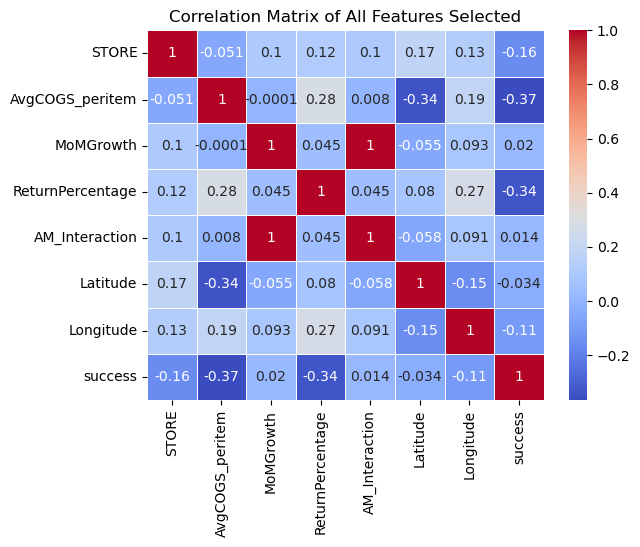

In [9]:
corr_matrix_with_interaction = store_df_wo_city.corr()
sns.heatmap(corr_matrix_with_interaction, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Features Selected')
plt.show()

Hence, we decide to drop `AvgCOGS_peritem` column because of the perfect correlation between the interaction term and `MoMGrowth` column.

In [10]:
store_df_of_interest = store_df[['STORE', 'MoMGrowth', 'ReturnPercentage', 'Latitude', 'Longitude', 'success']]
store_df_of_interest_with_city = store_df[['STORE', 'MoMGrowth', 'ReturnPercentage', 'CITY', 'Latitude', 'Longitude', 'success']]

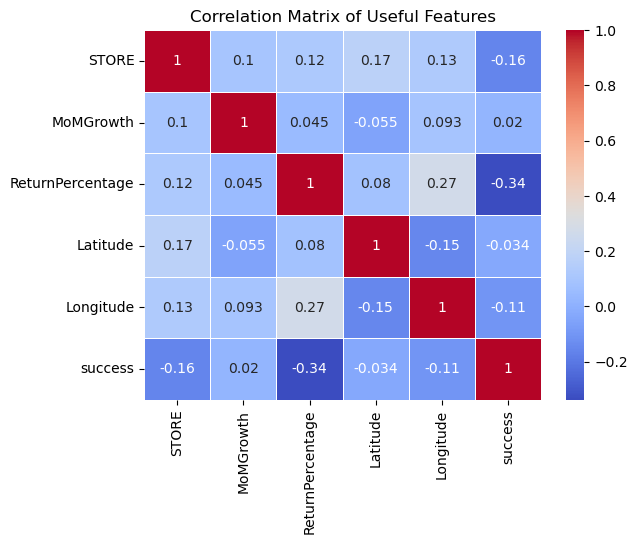

In [11]:
corr_matrix = store_df_of_interest.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Useful Features')
plt.show()

# Model Evaluation
Imbalanced dataset - using SMOTE

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = store_df_of_interest[['MoMGrowth', 'ReturnPercentage', 'Latitude', 'Longitude']]
y = store_df_of_interest['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=400)

# Use SMOTE to oversample the minority class in the training set only
smote = SMOTE(random_state=400)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# After SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

#Before SMOTE
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in X_train after SMOTE:", X_train_resampled.shape[0])

#After SMOTE
print("Number of samples in y_train:", y_train.shape[0])
print("Number of samples in y_train after SMOTE:", y_train_resampled.shape[0])

print("Number of samples in X_test:", X_test.shape[0])
print("Number of samples in y_test:", y_test.shape[0])

Class distribution before SMOTE:
success
0    220
1     41
Name: count, dtype: int64

Class distribution after SMOTE:
success
0    220
1    220
Name: count, dtype: int64
Number of samples in X_train: 261
Number of samples in X_train after SMOTE: 440
Number of samples in y_train: 261
Number of samples in y_train after SMOTE: 440
Number of samples in X_test: 66
Number of samples in y_test: 66


# Logistic Regression Model

In [13]:
import statsmodels.api as sm

# Add a constant to the features for the intercept term
X_train_resampled_with_const = sm.add_constant(X_train_resampled)

# Create a Logistic Regression model using statsmodels
logit_model_stats = sm.Logit(y_train_resampled, X_train_resampled_with_const)

# Fit the model
logit_result = logit_model_stats.fit()

# Display the summary
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.540872
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                  440
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2197
Time:                        10:42:16   Log-Likelihood:                -237.98
converged:                       True   LL-Null:                       -304.98
Covariance Type:            nonrobust   LLR p-value:                 5.424e-28
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.9221      2.248      6.637      0.000      10.516      19.329
MoMGrowth  

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Create a Logistic Regression model
logit_model = LogisticRegression(random_state=400)

# Fit the model on the resampled training set
logit_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the original test set
y_pred = logit_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

logit_model.score(X_train_resampled, y_train_resampled), logit_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84        57
           1       0.33      0.78      0.47         9

    accuracy                           0.76        66
   macro avg       0.64      0.77      0.65        66
weighted avg       0.87      0.76      0.79        66



(0.7977272727272727, 0.7575757575757576)

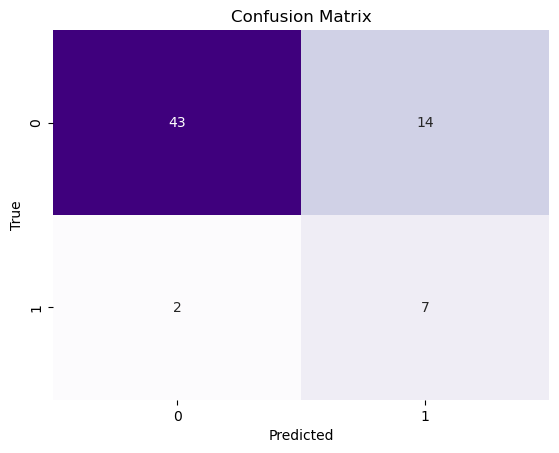

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=400)
decision_tree_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = decision_tree_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

decision_tree_model.score(X_train_resampled, y_train_resampled), decision_tree_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        57
           1       0.62      0.56      0.59         9

    accuracy                           0.89        66
   macro avg       0.78      0.75      0.76        66
weighted avg       0.89      0.89      0.89        66



(1.0, 0.8939393939393939)

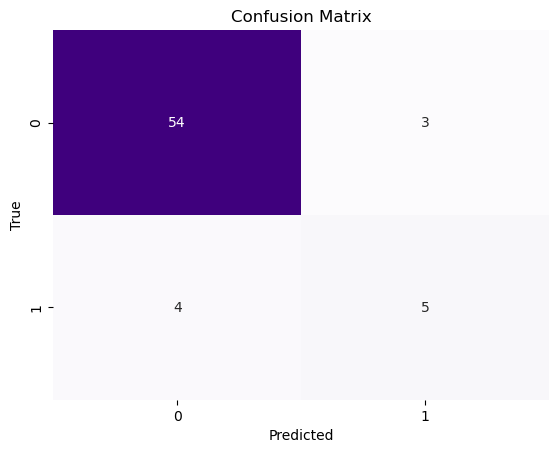

In [17]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=400)
random_forest_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = random_forest_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

random_forest_model.score(X_train_resampled, y_train_resampled), random_forest_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.64      0.78      0.70         9

    accuracy                           0.91        66
   macro avg       0.80      0.85      0.82        66
weighted avg       0.92      0.91      0.91        66



(1.0, 0.9090909090909091)

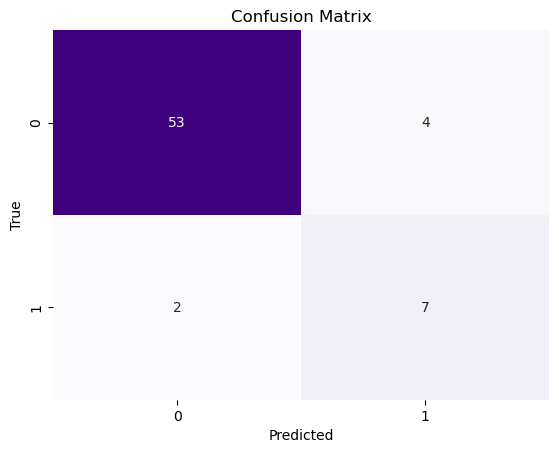

In [19]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [20]:
from sklearn.svm import SVC

svm_model = SVC(random_state=400)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

svm_model.score(X_train_resampled, y_train_resampled), svm_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        57
           1       0.21      0.56      0.30         9

    accuracy                           0.65        66
   macro avg       0.56      0.61      0.54        66
weighted avg       0.81      0.65      0.70        66



(0.6522727272727272, 0.6515151515151515)

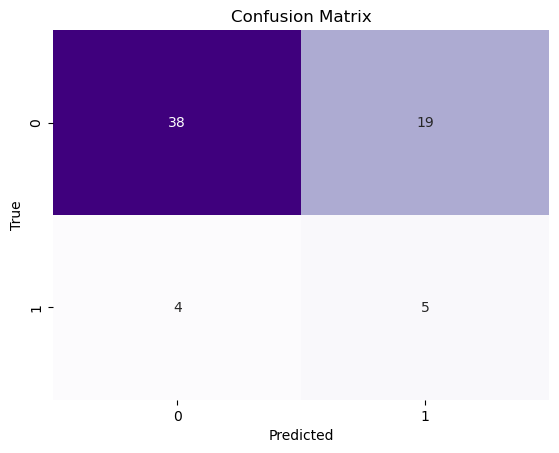

In [21]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

knn_model.score(X_train_resampled, y_train_resampled), knn_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.80        57
           1       0.28      0.78      0.41         9

    accuracy                           0.70        66
   macro avg       0.62      0.73      0.60        66
weighted avg       0.86      0.70      0.74        66



(0.875, 0.696969696969697)

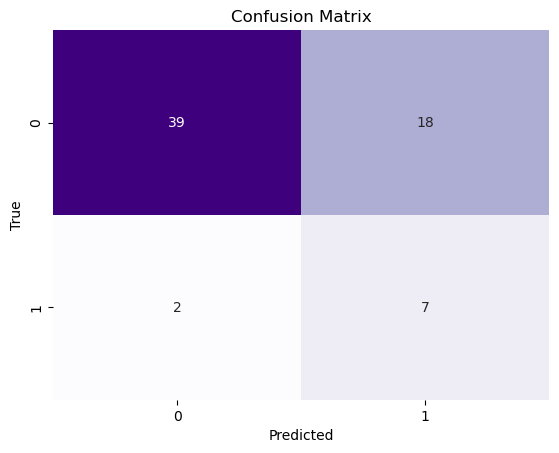

In [23]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Predicting and Recommendation

In [34]:
data = {
    'MoMGrowth': [20.4012, 0.8123, -0.12595, 0.067734, 0.4729],
    'ReturnPercentage': [0.002, 4.28038, 10.2903, 6.32, 5.2039],
    'Latitude': [35.395, 39.204, 32.380, 33.415, 33.451],
    'Longitude': [-95.814, -76.69, -86.312, -111.835, -112.016],
    'CITY': ['OKLAHOMA CITY', 'COLUMBIA', 'MONTGOMERY', 'MESA', 'PHOENIX']
}

validate_df = pd.DataFrame(data)
validate_df

,MoMGrowth,ReturnPercentage,Latitude,Longitude,CITY
0,20.401200,0.00200,35.395,-95.814,OKLAHOMA CITY
1,0.812300,4.28038,39.204,-76.690,COLUMBIA
2,-0.125950,10.29030,32.380,-86.312,MONTGOMERY
3,0.067734,6.32000,33.415,-111.835,MESA
4,0.472900,5.20390,33.451,-112.016,PHOENIX


In [35]:
validate_df = validate_df[['MoMGrowth', 'ReturnPercentage', 'Latitude', 'Longitude']]

# Predict 'success' labels for the validation data
y_pred_validate_rf = random_forest_model.predict(validate_df)

# Printing the predicted labels for validation data
print("Predicted 'success' labels for validation data:")
print(y_pred_validate_rf)

Predicted 'success' labels for validation data:
[0 1 0 0 1]


# Verification

In [36]:
store_df_of_interest_with_city[store_df_of_interest_with_city['CITY'].str.contains(r'\bOKLAHOMA CITY\b', regex=True, case=False)]

,STORE,MoMGrowth,ReturnPercentage,CITY,Latitude,Longitude,success
311,9204,0.073795,8.185012,OKLAHOMA CITY,35.4676,-97.5164,0
315,9304,0.059208,7.619361,OKLAHOMA CITY,35.4676,-97.5164,0
318,9404,0.093233,7.321692,OKLAHOMA CITY,35.4676,-97.5164,0


In [37]:
store_df_of_interest_with_city[store_df_of_interest_with_city['CITY'].str.contains(r'\bCOLUMBIA\b', regex=True, case=False)]

,STORE,MoMGrowth,ReturnPercentage,CITY,Latitude,Longitude,success
47,1203,0.471192,7.444798,COLUMBIA,39.2037,-76.8610,1
233,6404,0.063145,7.447650,COLUMBIA,39.2037,-76.8610,0
239,6804,0.096326,8.313295,COLUMBIA,41.3145,-81.8357,0


In [38]:
store_df_of_interest_with_city[store_df_of_interest_with_city['CITY'].str.contains(r'\bMONTGOMERY\b', regex=True, case=False)]

,STORE,MoMGrowth,ReturnPercentage,CITY,Latitude,Longitude,success
247,7102,0.199494,7.457060,MONTGOMERY,32.3792,-86.3077,0
251,7202,0.166481,7.918486,MONTGOMERY,32.3792,-86.3077,0


In [39]:
store_df_of_interest_with_city[store_df_of_interest_with_city['CITY'].str.contains(r'\bMESA\b', regex=True, case=False)]

,STORE,MoMGrowth,ReturnPercentage,CITY,Latitude,Longitude,success
21,509,0.165585,7.626204,MESA,33.4152,-111.8315,1
35,909,0.120334,7.416626,MESA,33.4152,-111.8315,1


In [40]:
store_df_of_interest_with_city[store_df_of_interest_with_city['CITY'].str.contains(r'\bPHOENIX\b', regex=True, case=False)]

,STORE,MoMGrowth,ReturnPercentage,CITY,Latitude,Longitude,success
11,309,0.188973,6.477370,PHOENIX,33.4484,-112.074,1
16,409,0.102680,8.378462,PHOENIX,33.4484,-112.074,0
24,609,0.121972,6.071628,PHOENIX,33.4484,-112.074,1


# Appendix: Map Visualization

In [41]:
import folium
from folium.plugins import MarkerCluster# Create a Folium map centered around the first store's coordinates
m = folium.Map(location=[27.947760, -82.458444], zoom_start=5)

# Create MarkerClusters for success and failure
success_cluster = MarkerCluster(name='Success')
failure_cluster = MarkerCluster(name='Failure')

# Iterate through the DataFrame and add markers to the clusters
for index, data in store_df.iterrows():
    lat, lon = data['Latitude'], data['Longitude']
    success = data['success']
    store = data['STORE']  # Replace 'store' with 'data['STORE']'

    # Choose marker color based on success
    color = 'green' if success == 1 else 'red'

    # Create a marker
    marker = folium.Marker(location=[lat, lon], popup=f'Store: {store}', icon=folium.Icon(color=color))

    # Add marker to appropriate cluster
    if success == 1:
        marker.add_to(success_cluster)
    else:
        marker.add_to(failure_cluster)

# Add clusters to the map
success_cluster.add_to(m)
failure_cluster.add_to(m)

# Add a LayerControl to toggle between Success and Failure clusters
folium.LayerControl().add_to(m)

# Save the map as an HTML file or display it
# m.save('store_success_map.html')
m